C:\Users\nikma\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: average_over_repetitions() takes 7 positional arguments but 8 were given

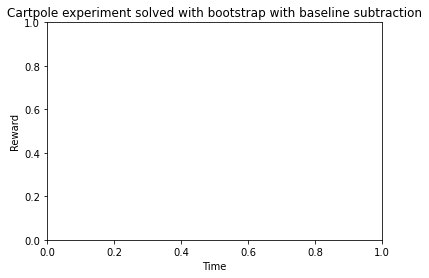

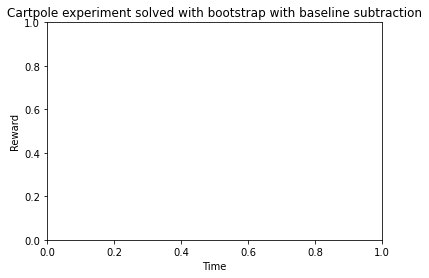

In [5]:
import numpy as np
import time
from Helper import LearningCurvePlot, smooth
from bootstrap+baseline_subtraction import *

def average_over_repetitions(smoothing_window, plot, n_repetitions, n_episodes, learning_rate,
                             gamma, batch_update_size, N):

    reward_results = np.empty([n_repetitions,n_episodes]) # Result array
    now = time.time()
    
    for rep in range(n_repetitions): # Loop over repetitions
        rewards = cartpole(learning_rate, batch_update_size, gamma, n_episodes, N)
        reward_results[rep] = rewards
        
    print('Running one setting takes {} minutes'.format((time.time()-now)/60))    
    learning_curve = np.mean(reward_results,axis=0) # average over repetitions
    learning_curve = smooth(learning_curve,smoothing_window) # additional smoothing
    return learning_curve

def experiment():
    ####### Settings
    # Experiment    
    n_repetitions = 5
    smoothing_window = 501
    n_episodes = 10000
    gamma = 0.99
    
    # Plotting parameters
    plot = True
    
    # Nice labels for plotting
    policy_labels = {'basesub': 'baseline subtraction',
                  'boot': 'bootstrap', 'b+b': 'bootstrap with baseline subtraction'}       #Something here might need to be changed

    
    ####### Experiments
    
    good_average_reward = 250 # We set this as a benchmark of good average reward reached by the algorithm
    
    policy = 'b+b'
    Plot1 = LearningCurvePlot(title = 'Cartpole experiment solved with ' + policy_labels[policy])
    Plot2 = LearningCurvePlot(title = 'Cartpole experiment solved with ' + policy_labels[policy])
    lr = [0.001, 0.01, 0.0001]
    batch_sizes = [1,8]
    N_sizes = [12, 24, 48]
    N_1 = 24
    batch_update_size_1 = 1
    for learning_rate in lr:
        for batch_update_size in batch_sizes:
            learning_curve = average_over_repetitions(smoothing_window, plot, n_repetitions, n_episodes, learning_rate,
                             gamma, batch_update_size, N_1)
            Plot1.add_curve(learning_curve,label = 'lr: ' + str(learning_rate) + ', bu: ' + str(batch_update_size))

    Plot1.add_hline(good_average_reward, label = 'Threshold for good reward')
    Plot1.save('cartpole_test_' + policy_labels[policy] + '_learning_rate_bu_' + '.png')
    
    for N in N_sizes:
        for batch_update_size in batch_sizes:
            learning_rate_1 = 0.001
            learning_curve = average_over_repetitions(smoothing_window, plot, n_repetitions, n_episodes, learning_rate_1,
                                 gamma, batch_update_size)
            Plot2.add_curve(learning_curve, label = 'N: ' + str(n) + ', bu: ' + str(batch_update_size))
        
    Plot2.add_hline(good_average_reward, label = 'Threshold for good reward')
    Plot2.save('cartpole_test_' + policy_labels[policy] + '_Nsize_bu' + '.png')

if __name__ == '__main__':
    experiment()

    
# To run with actor_critic: change import + add N as input to average_over_repetitions + ad N as hyperparameter + change 
# number of batch sizes and learning rates